In [23]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras

In [24]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [43]:
train_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [26]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [27]:
import matplotlib.pyplot as plt

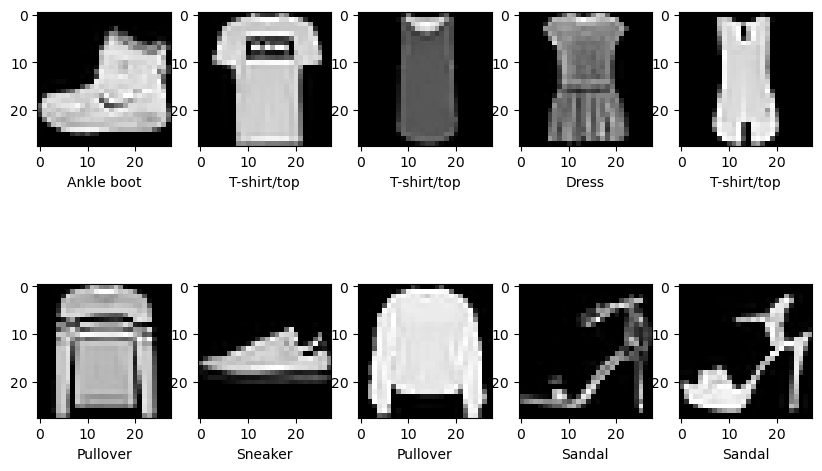

In [28]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(3,5, i + 1)
    plt.imshow(train_images[i], cmap= 'gray')
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [29]:
# normalize

train_images = train_images / 255
test_images = test_images / 255

In [30]:
# Reshape for CNN input

train_images = train_images.reshape(train_images.shape[0], 28,
                                   28, 1)

test_images = test_images.reshape(test_images.shape[0], 28,
                                   28, 1)

In [31]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu',
                       input_shape = (28,28,1)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation= 'relu'),
    keras.layers.Dense(10, activation= 'softmax')
    
])

In [36]:
model.compile(optimizer= 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [37]:
train_images.shape

(60000, 28, 28, 1)

In [38]:
train_labels.shape

(60000,)

In [39]:
model.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8147 - loss: 0.5257
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9028 - loss: 0.2699
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9191 - loss: 0.2197
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9322 - loss: 0.1860
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9413 - loss: 0.1579
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9528 - loss: 0.1291
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9601 - loss: 0.1096
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9676 - loss: 0.0907
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9726 - loss: 0.0780
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9769 - loss: 0.0644


In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9121 - loss: 0.3435


In [41]:
test_loss

0.324628084897995

In [42]:
test_acc

0.916100025177002